In [ ]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
DATA_PATH = os.environ.get("data_path")
sys.path.insert(0, os.getenv('lib_path'))
sys.path.insert(0, os.getenv('root_path'))

In [1]:
from lib.notebook_imports import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

%load_ext autoreload
%autoreload 2

shap.initjs()

start_time = datetime.now()


# READ DATA

In [ ]:
data_900 = read_data('/dysk1/approx/invicta/1.1.1./', merge_with_meds=True, merge_with_patient_genes=True)
data_900_df = data_900.input_df
data_2015_df = read_data_2015('/dysk1/approx/invicta/1.1.1./')

LGB_PARAMS_BASE, N_FOLDS, ALL_MODEL_SUFFIXES, BASE_COLS_1, BASE_COLS_2 = get_consts()

DATA_SERIES_900, DATA_SERIES_2015, DATA_SERIES = prepare_data_series(data_900_df, data_2015_df, N_FOLDS)


# BASE EXPERIMENTS

In [3]:
BASE_RESULTS = perform_base_experiments(
    LGB_PARAMS_BASE,
    DATA_SERIES,
    ALL_MODEL_SUFFIXES,
    ['l2'],
    [BASE_COLS_1, BASE_COLS_2]
)

invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value en

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.67    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.40    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.86    
LIKELIHOOD[fold_avg][l2][900_cumulus_denuded]: count:530    avg:7.64   4.57    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.55    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.65    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.75    
LIKELIHOOD[fold_avg][l2][900_day_0_mii]:       count:516    avg:5.92   3.30    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   4.77    
MAE[fold_avg][l2][2015_cumulus_denuded]:       count:8673   avg:9.08   3.58    
MAPE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   0.66    
LIKELIHOOD[fold_avg][l2][2015_cumulus_denuded]: count:

invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalar

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.41    (-0.26)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.16    (-0.24)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    
LIKELIHOOD[fold_avg][l2][900_cumulus_denuded]: count:530    avg:7.64   4.57    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.53    (-0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.58    (-0.06)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.71    (-0.04)    
LIKELIHOOD[fold_avg][l2][900_day_0_mii]:       count:516    avg:5.92   3.30    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8673   avg:9.08   4.54    (-0.22)    
MAE[fold_avg][l2][2015_cumulus_denuded]:       count:8673   avg:9.08   3.39    (-0.19)    
MAPE[fold_avg][l2][2015_cu

invalid value encountered in log
divide by zero encountered in double_scalars


# PREPARE COLUMN SETS

In [4]:
COL_SETS = prepare_column_sets(data_900, data_2015_df)

In [5]:
all_sum = 0
for key, cols in asdict(COL_SETS).items():
    print(f'{key.ljust(40, " ")}: {len(cols)}')
    all_sum += len(cols)

print(all_sum)

DS1_PECH_COLS                           : 6
MODULATED_COLS                          : 3
DS1_RESULT_COLS                         : 4
VARIOUS_COLS_900                        : 6
BODY_COLS_900                           : 3
HORMONE_COLS_900                        : 8
HORMONE_NORMS_COLS_900                  : 8
HORMONE_NORMS_VALID_IN_TIME_COLS_900    : 8
VALID_SUM_DOSES_COLS_900                : 19
VALID_SUM_DOSES_AND_DAYS_DIFF_COLS_900  : 20
CAUSE_COLS_900                          : 11
VARIOUS_COLS_2015                       : 6
HORMONE_COLS_2015                       : 7
HORMONE_NORMS_COLS_2015                 : 7
HORMONE_NORMS_VALID_IN_TIME_COLS_2015   : 6
FSH_NORM_CYCLED_COLS_2015               : 1
CAUSE_COLS_2015                         : 11
134


In [6]:

for key, cols in asdict(COL_SETS).items():
    print("============================")
    print(key)
    print_cols(cols)

DS1_PECH_COLS
Number of columns: 6
-
    "ds1_pech_licz_14_pow",
    "ds1_pech_licz_18_pow",
    "ds1_pech_licz_11_pow",
    "ds1_pech_licz_3_8",
    "ds1_pech_licz_2_8",
    "ds1_pech_licz_16_22",
-
MODULATED_COLS
Number of columns: 3
-
    "ds1_3_dawka_dzienna",
    "ds4_7_dawka_dzienna",
    "prot_type",
-
DS1_RESULT_COLS
Number of columns: 4
-
    "ds_1_result_num_AMH",
    "ds_1_result_num_E2",
    "ds_1_result_num_LH",
    "ds_1_result_num_PRG",
-
VARIOUS_COLS_900
Number of columns: 6
-
    "pickup_no_4m_prev",
    "poseidon_group",
    "prev_proc-denuded_per_bubbles",
    "prev_proc-mii_per_bubbles",
    "prev_proc-ds1_3_dawka_dzienna",
    "prev_proc-ds4_7_dawka_dzienna",
-
BODY_COLS_900
Number of columns: 3
-
    "weight",
    "height",
    "bmi",
-
HORMONE_COLS_900
Number of columns: 8
-
    "test_inhibina_b_r",
    "test_tsh_r",
    "test_e2_r",
    "test_fsh_r",
    "test_lh_r",
    "test_testosterone_r",
    "test_shbg_r",
    "test_dhea_s_r",
-
HORMONE_NORMS_COLS_900
Numb

In [ ]:
%%time

GENE_COL_SETS = prepare_gene_column_sets(
    data_900,
    LGB_PARAMS_BASE,
    BASE_COLS_2,
    DATA_SERIES_900,
    ['l1', 'l2', 'log_l2', 'mape']
)

In [44]:
for key, cols in asdict(GENE_COL_SETS).items():
    print(f'{key.ljust(40, " ")}: {len(cols)}')

ALL_GENES_COLS_900                      : 673
LITERATURE_GENES_COLS_900               : 18
SHAP_IMPORTANT_GENES_COLS_900           : 23
BORUTA_GENES_LONGLIST_WITH_AMH_900      : 59
BORUTA_GENES_LONGLIST_WITHOUT_AMH_900   : 83
SHORTLIST_RANDOM_6_FROM_BORUTA_GENES_LONGLIST_WITH_AMH_900: 6
BORUTA_GENES_SHORTLIST_WITH_AMH_900     : 7
BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900  : 20
SHORTLIST_CONST_900                     : 6
SHORTLIST_CONST_MOTIVATING_900          : 3
SHORTLIST_CONST_DEMOTIVATING_900        : 3


In [45]:
for key, cols in asdict(GENE_COL_SETS).items():
    print("============================")
    print(key)
    print_cols(cols)

ALL_GENES_COLS_900
Number of columns: 673
-
    "AMHR2_12_53424132_T_A",
    "AMHR2_12_53424433_G_A",
    "AMHR2_12_53425136_C_T",
    "AMHR2_12_53425326_A_G",
    "AMHR2_12_53425683_C_T",
    "AMHR2_12_53428886_G_A",
    "AMHR2_12_53429208_T_C",
    "AMHR2_12_53429253_G_A",
    "AMHR2_12_53429539_C_T",
    "AMHR2_12_53429764_A_G",
    "AMHR2_12_53430187_CTGGGCAATACCCCTACCTCTGATGAG_-",
    "AMHR2_12_53430359_A_G",
    "AMHR2_12_53430960_A_G",
    "AMHR2_12_53431536_T_C",
    "AMHR2_12_53431541_T_C",
    "AMH_19_2249385_C_T",
    "AMH_19_2249408_A_G",
    "AMH_19_2249584_G_A",
    "AMH_19_2249635_G_A",
    "AMH_19_2249737_G_C",
    "AMH_19_2250176_C_T",
    "AMH_19_2250237_G_A",
    "AMH_19_2250313_C_T",
    "AMH_19_2250352_C_T",
    "AMH_19_2250470_G_A",
    "AMH_19_2250477_C_G",
    "AMH_19_2250523_G_A",
    "AMH_19_2250529_G_A",
    "AMH_19_2251138_C_G",
    "AMH_19_2251179_G_A",
    "AMH_19_2251180_G_A",
    "AMH_19_2251248_A_G",
    "AMH_19_2251328_C_T",
    "AMH_19_2251513_T_A",
 

# TRAIN COMBINATIONS

In [8]:
MODEL_SUFFIX = 'mape'
SORT_METRIC = 'MAPE'

MODEL_SUFFIX = 'l2'
SORT_METRIC = 'RMSE'

ETA_900 = 1.12
ETA_2015 = 1/1.80

SELECTED_BASE_RESULT = BASE_RESULTS[1]

# TRAIN FULL COLUMN SETS

In [47]:
for key, cols in asdict(COL_SETS).items():
    print("============================")
    print(key)
    if key == 'VALID_SUM_DOSES_AND_DAYS_DIFF_COLS_900':
        continue
    
    TRAIN_RESULTS = train_data_series(
        LGB_PARAMS_BASE, DATA_SERIES_900,
        BASE_COLS_2 + cols,
        model_suffixes_filter=ALL_MODEL_SUFFIXES)

    TRAIN_RESULTS.print_errors(
        BASE_RESULTS,
        print_suffixes=['l2'],
        print_avg=True,
    )

DS1_PECH_COLS


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Overriding the parameters from Reference Dataset.


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.45    (-0.22)    (0.04)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.18    (-0.21)    (0.03)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.78    (-0.08)    (0.03)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.55    (-0.00)    (0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.60    (-0.05)    (0.02)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.72    (-0.04)    (0.00)    
-----------------------------
MODULATED_COLS


categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Over

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.42    (-0.25)    (0.00)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.13    (-0.27)    (-0.03)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.73    (-0.13)    (-0.02)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.53    (-0.02)    (0.00)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.59    (-0.06)    (0.00)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.72    (-0.03)    (0.01)    
-----------------------------
VARIOUS_COLS_900


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
ca

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.44    (-0.23)    (0.03)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.15    (-0.25)    (-0.01)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.12)    (-0.01)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.55    (-0.01)    (0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.60    (-0.05)    (0.01)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.72    (-0.03)    (0.01)    
-----------------------------
BODY_COLS_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.47    (-0.20)    (0.05)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.20    (-0.20)    (0.04)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    (0.00)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.55    (-0.00)    (0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.62    (-0.03)    (0.04)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.73    (-0.02)    (0.02)    
-----------------------------
HORMONE_COLS_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Overriding the parameters from Reference Dataset.


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.51    (-0.16)    (0.09)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.26    (-0.14)    (0.10)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.80    (-0.06)    (0.05)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.51    (-0.05)    (-0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.58    (-0.07)    (-0.01)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.72    (-0.03)    (0.01)    
-----------------------------
HORMONE_NORMS_COLS_900


categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Over

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.50    (-0.18)    (0.08)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.21    (-0.19)    (0.05)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.77    (-0.09)    (0.02)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.52    (-0.03)    (-0.01)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.59    (-0.06)    (0.00)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.72    (-0.03)    (0.01)    
-----------------------------
HORMONE_NORMS_VALID_IN_TIME_COLS_900


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
ca

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.47    (-0.20)    (0.06)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.19    (-0.21)    (0.03)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.77    (-0.09)    (0.02)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.53    (-0.03)    (-0.00)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.59    (-0.06)    (0.00)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.71    (-0.04)    (0.00)    
-----------------------------
VALID_SUM_DOSES_COLS_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.33    (-0.34)    (-0.08)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.11    (-0.29)    (-0.05)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.74    (-0.12)    (-0.01)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.52    (-0.03)    (-0.01)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.56    (-0.09)    (-0.03)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.70    (-0.05)    (-0.01)    
-----------------------------
VALID_SUM_DOSES_AND_DAYS_DIFF_COLS_900
CAUSE_COLS_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.46    (-0.21)    (0.05)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.18    (-0.22)    (0.02)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    (-0.01)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.53    (-0.02)    (0.00)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.57    (-0.07)    (-0.01)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.70    (-0.05)    (-0.01)    
-----------------------------
VARIOUS_COLS_2015


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
ca

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.44    (-0.23)    (0.03)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.15    (-0.25)    (-0.01)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.12)    (-0.01)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.55    (-0.01)    (0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.60    (-0.05)    (0.01)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.72    (-0.03)    (0.01)    
-----------------------------
HORMONE_COLS_2015


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.60    (-0.07)    (0.19)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.29    (-0.11)    (0.13)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.82    (-0.05)    (0.06)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.50    (-0.05)    (-0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.56    (-0.09)    (-0.02)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.71    (-0.04)    (0.00)    
-----------------------------
HORMONE_NORMS_COLS_2015
Column norm_FSH not in data serie 900_cumulus_denuded
Column norm_FSH not in data serie 900_day_0_mii
-
-----------------------------
-
-----------------------------
HORMONE_NORMS_VALID_IN_TIME_COLS_2015
Column valid_norm_FSH not in data serie 900_cumulus_denuded
Column valid_norm_FSH not in data serie 

divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.46    (-0.21)    (0.05)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.18    (-0.22)    (0.02)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    (-0.01)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.53    (-0.02)    (0.00)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.57    (-0.07)    (-0.01)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.70    (-0.05)    (-0.01)    
-----------------------------


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


# DS1_RESULTS


0it [00:00, ?it/s]

Number of columns: 4
-
    "ds_1_result_num_AMH",
    "ds_1_result_num_E2",
    "ds_1_result_num_LH",
    "ds_1_result_num_PRG",
-
# Number of column combinations: 15
# ETA: 0:00:13


15it [00:19,  1.28s/it]

model: l2
sorted_by: RMSE


index         0
0  RMSE_900_cumulus_denuded -0.013684
1        RMSE_900_day_0_mii -0.032816

RMSE_900_cumulus_denuded


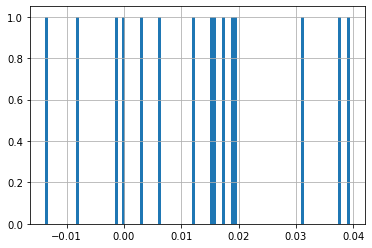

RMSE_900_day_0_mii


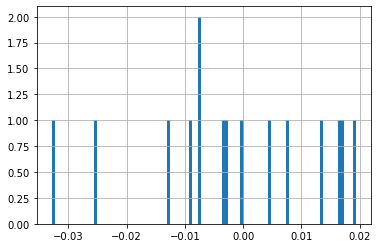

CPU times: user 1min 18s, sys: 756 ms, total: 1min 19s
Wall time: 20.2 s


In [9]:
%%time

print_cols(COL_SETS.DS1_RESULT_COLS)

ds1_results_df = train_generated_cols(
    gen_combinations(COL_SETS.DS1_RESULT_COLS, 0, 3),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    10, ETA_900)

# BODY_900


0it [00:00, ?it/s]

Number of columns: 3
-
    "weight",
    "height",
    "bmi",
-
# Number of column combinations: 8
# ETA: 0:00:07


8it [00:05,  1.43it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.004674
1                                        RMSE_900_day_0_mii -0.025171
2                    RMSE_0b_first_time_900_cumulus_denuded -0.008038
3                  RMSE_0c_prev10ormore_900_cumulus_denuded  0.000000
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.130876
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.118168
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.277339
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.048875
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded  0.000000
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.087301
10                         RMSE_0b_first_time_900_day_0_mii -0.112344
11                       RMSE_0c_prev10ormore_900_day_0_mii  0.000000
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.001564
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.100282
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.253425
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.120854
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii  0.000000
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.072302

RMSE_900_cumulus_denuded


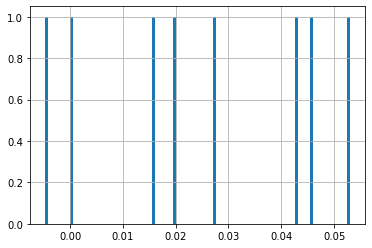

RMSE_900_day_0_mii


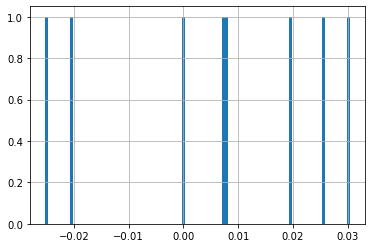

CPU times: user 29.6 s, sys: 185 ms, total: 29.8 s
Wall time: 6.28 s


In [48]:
%%time

print_cols(COL_SETS.BODY_COLS_900)

ds1_pech_df = train_generated_cols(
    gen_combinations(COL_SETS.BODY_COLS_900, 0, 3),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    10, ETA_900)

# BODY VS MODULATED


0it [00:00, ?it/s]

Number of columns: 3
-
    "weight",
    "height",
    "bmi",
-
Number of columns: 3
-
    "ds1_3_dawka_dzienna",
    "ds4_7_dawka_dzienna",
    "prot_type",
-
# Number of column combinations: 64
# ETA: 0:00:57


3it [00:02,  1.36it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
21it [00:16,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
37it [00:28,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

53it [00:41,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.021004
1                                        RMSE_900_day_0_mii -0.028002
2                    RMSE_0b_first_time_900_cumulus_denuded -0.008038
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.116744
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.172391
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.163842
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.283352
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.062772
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.066828
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.115595
10                         RMSE_0b_first_time_900_day_0_mii -0.115255
11                       RMSE_0c_prev10ormore_900_day_0_mii  0.000000
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.047824
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.246755
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.311237
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.120854
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.004612
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.072302

RMSE_900_cumulus_denuded


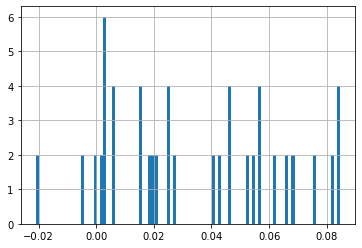

RMSE_900_day_0_mii


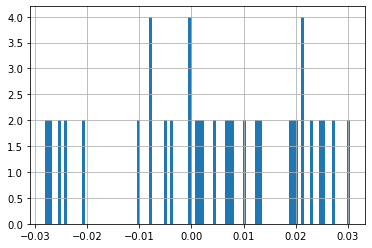

CPU times: user 4min 10s, sys: 1.5 s, total: 4min 12s
Wall time: 50.6 s


In [49]:
%%time

print_cols(COL_SETS.BODY_COLS_900)
print_cols(COL_SETS.MODULATED_COLS)

hormoes_vs_boruta_genes_df = train_generated_cols(
    gen_product_generators_2(
        gen_combinations(COL_SETS.BODY_COLS_900, 0, 3),
        gen_combinations(COL_SETS.MODULATED_COLS, 0, 3),
    ),
    LGB_PARAMS_BASE, 
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    25, ETA_900)

# DS1_PECH


0it [00:00, ?it/s]

Number of columns: 6
-
    "ds1_pech_licz_14_pow",
    "ds1_pech_licz_18_pow",
    "ds1_pech_licz_11_pow",
    "ds1_pech_licz_3_8",
    "ds1_pech_licz_2_8",
    "ds1_pech_licz_16_22",
-
# Number of column combinations: 21
# ETA: 0:00:19


21it [00:14,  1.44it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded  0.000000
1                                        RMSE_900_day_0_mii -0.000325
2                    RMSE_0b_first_time_900_cumulus_denuded  0.000000
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.122992
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.068886
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.091377
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.042653
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.054629
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.021026
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.022318
10                         RMSE_0b_first_time_900_day_0_mii -0.013370
11                       RMSE_0c_prev10ormore_900_day_0_mii  0.000000
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.030094
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.085835
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.094407
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.010078
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.003960
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.008638

RMSE_900_cumulus_denuded


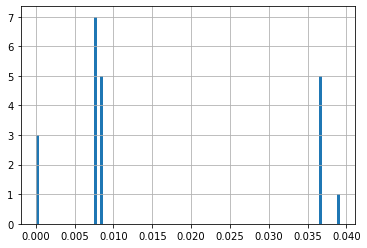

RMSE_900_day_0_mii


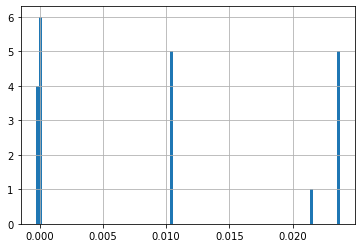

CPU times: user 1min 15s, sys: 413 ms, total: 1min 15s
Wall time: 15.2 s


In [14]:
%%time

print_cols(COL_SETS.DS1_PECH_COLS)

ds1_pech_df = train_generated_cols(
    gen_combinations(COL_SETS.DS1_PECH_COLS, 1, 2),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)


0it [00:00, ?it/s]

Number of columns: 6
-
    "ds1_pech_licz_14_pow",
    "ds1_pech_licz_18_pow",
    "ds1_pech_licz_11_pow",
    "ds1_pech_licz_3_8",
    "ds1_pech_licz_2_8",
    "ds1_pech_licz_16_22",
-
# Number of column combinations: 21
# ETA: 0:00:38


21it [00:20,  1.00it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_2015_cumulus_denuded -0.005399
1                                        RMSE_2015_day_0_mii -0.002472
2                    RMSE_0b_first_time_2015_cumulus_denuded -0.001523
3                  RMSE_0c_prev10ormore_2015_cumulus_denuded -0.057607
4   RMSE_1a_young35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.027458
5   RMSE_1b_young35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.007165
6     RMSE_2a_old35_highAMH1.2_prev0to3_2015_cumulus_denuded  0.001381
7     RMSE_2b_old35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.011468
8              RMSE_3_young35_lowAMH1.2_2015_cumulus_denuded -0.003957
9                RMSE_4_old35_lowAMH1.2_2015_cumulus_denuded -0.005040
10                         RMSE_0b_first_time_2015_day_0_mii -0.002421
11                       RMSE_0c_prev10ormore_2015_day_0_mii -0.021944
12        RMSE_1a_young35_highAMH1.2_prev0to3_2015_day_0_mii -0.028380
13        RMSE_1b_young35_highAMH1.2_prev4to9_2015_day_0_mii -0.003274
14          RMSE_2a_old35_highAMH1.2_prev0to3_2015_day_0_mii -0.025289
15          RMSE_2b_old35_highAMH1.2_prev4to9_2015_day_0_mii -0.000808
16                   RMSE_3_young35_lowAMH1.2_2015_day_0_mii -0.004680
17                     RMSE_4_old35_lowAMH1.2_2015_day_0_mii -0.009055

RMSE_2015_cumulus_denuded


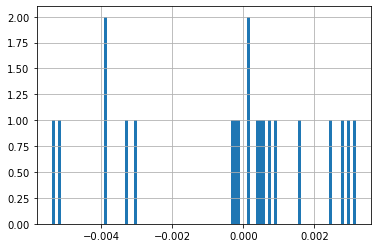

RMSE_2015_day_0_mii


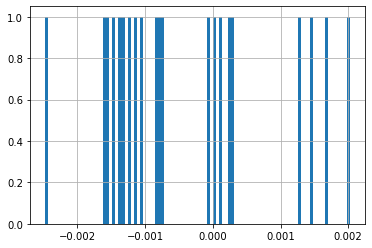

CPU times: user 2min 13s, sys: 704 ms, total: 2min 14s
Wall time: 21.7 s


In [15]:
%%time

print_cols(COL_SETS.DS1_PECH_COLS)

ds1_pech_df = train_generated_cols(
    gen_combinations(COL_SETS.DS1_PECH_COLS, 1, 2),
    LGB_PARAMS_BASE,
    DATA_SERIES_2015,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_2015)

# MODULATED


0it [00:00, ?it/s]

Number of columns: 3
-
    "ds1_3_dawka_dzienna",
    "ds4_7_dawka_dzienna",
    "prot_type",
-
# Number of column combinations: 7
# ETA: 0:00:06


2it [00:01,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded  0.000000
1                                        RMSE_900_day_0_mii -0.024100
2                    RMSE_0b_first_time_900_cumulus_denuded  0.000000
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.116744
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.172391
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.032904
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.203276
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.053509
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.066828
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.070367
10                         RMSE_0b_first_time_900_day_0_mii -0.013870
11                       RMSE_0c_prev10ormore_900_day_0_mii  0.000000
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.047824
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.246755
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.178582
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.076277
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.004612
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.017118

RMSE_900_cumulus_denuded


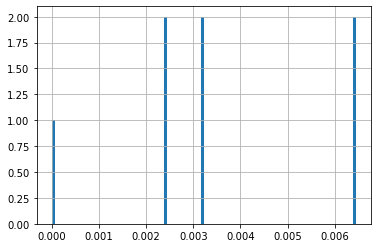

RMSE_900_day_0_mii


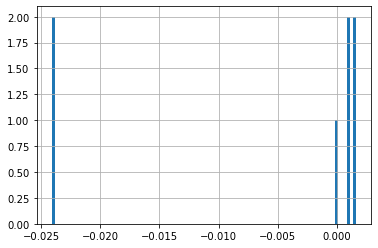

CPU times: user 25.4 s, sys: 180 ms, total: 25.5 s
Wall time: 5.84 s


In [16]:
%%time

print_cols(COL_SETS.MODULATED_COLS)

modulated_df = train_generated_cols(
    gen_combinations(COL_SETS.MODULATED_COLS, 1, 4),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)


0it [00:00, ?it/s]

Number of columns: 3
-
    "ds1_3_dawka_dzienna",
    "ds4_7_dawka_dzienna",
    "prot_type",
-
# Number of column combinations: 7
# ETA: 0:00:13


2it [00:01,  1.02it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_2015_cumulus_denuded -0.015793
1                                        RMSE_2015_day_0_mii -0.013452
2                    RMSE_0b_first_time_2015_cumulus_denuded -0.020654
3                  RMSE_0c_prev10ormore_2015_cumulus_denuded -0.045195
4   RMSE_1a_young35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.002577
5   RMSE_1b_young35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.016779
6     RMSE_2a_old35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.037439
7     RMSE_2b_old35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.029855
8              RMSE_3_young35_lowAMH1.2_2015_cumulus_denuded -0.001736
9                RMSE_4_old35_lowAMH1.2_2015_cumulus_denuded  0.004517
10                         RMSE_0b_first_time_2015_day_0_mii -0.021380
11                       RMSE_0c_prev10ormore_2015_day_0_mii -0.004281
12        RMSE_1a_young35_highAMH1.2_prev0to3_2015_day_0_mii -0.010888
13        RMSE_1b_young35_highAMH1.2_prev4to9_2015_day_0_mii -0.020836
14          RMSE_2a_old35_highAMH1.2_prev0to3_2015_day_0_mii -0.038120
15          RMSE_2b_old35_highAMH1.2_prev4to9_2015_day_0_mii -0.016285
16                   RMSE_3_young35_lowAMH1.2_2015_day_0_mii -0.009426
17                     RMSE_4_old35_lowAMH1.2_2015_day_0_mii -0.006362

RMSE_2015_cumulus_denuded


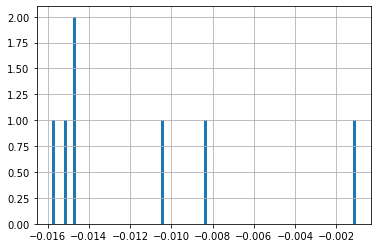

RMSE_2015_day_0_mii


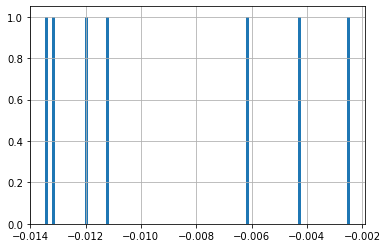

CPU times: user 47.2 s, sys: 274 ms, total: 47.5 s
Wall time: 8.05 s


In [17]:
%%time

print_cols(COL_SETS.MODULATED_COLS)

modulated_df = train_generated_cols(
    gen_combinations(COL_SETS.MODULATED_COLS, 1, 4),
    LGB_PARAMS_BASE,
    DATA_SERIES_2015,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_2015)

# VARIOUS


0it [00:00, ?it/s]

Number of columns: 6
-
    "pickup_no_4m_prev",
    "poseidon_group",
    "prev_proc-denuded_per_bubbles",
    "prev_proc-mii_per_bubbles",
    "prev_proc-ds1_3_dawka_dzienna",
    "prev_proc-ds4_7_dawka_dzienna",
-
# Number of column combinations: 56
# ETA: 0:00:50


1it [00:00,  1.44it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
24it [00:17,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
42it [00:30,  1.37it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

54it [00:39,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.004072
1                                        RMSE_900_day_0_mii -0.010422
2                    RMSE_0b_first_time_900_cumulus_denuded -0.006182
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.076947
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.177194
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.039074
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.168919
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.133653
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.067084
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.074374
10                         RMSE_0b_first_time_900_day_0_mii -0.028225
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.125778
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.039874
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.100029
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.151027
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.017466
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.013794
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.045335

RMSE_900_cumulus_denuded


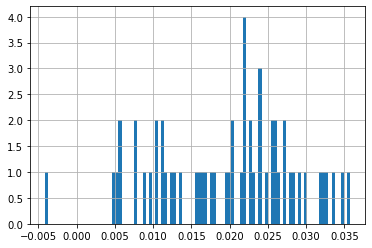

RMSE_900_day_0_mii


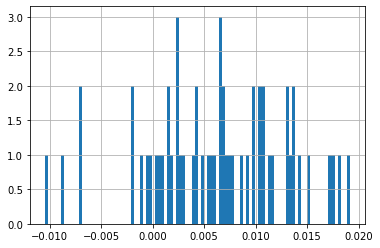

CPU times: user 3min 28s, sys: 1.13 s, total: 3min 30s
Wall time: 42.1 s


In [18]:
%%time

print_cols(COL_SETS.VARIOUS_COLS_900)

various_df = train_generated_cols(
    gen_combinations(COL_SETS.VARIOUS_COLS_900, 1, 4),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)


0it [00:00, ?it/s]

Number of columns: 6
-
    "pickup_no_4m_prev",
    "poseidon_group",
    "prev_proc-denuded_per_bubbles",
    "prev_proc-mii_per_bubbles",
    "prev_proc-ds1_3_dawka_dzienna",
    "prev_proc-ds4_7_dawka_dzienna",
-
# Number of column combinations: 56
# ETA: 0:01:41


1it [00:01,  1.01s/it]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
24it [00:24,  1.05s/it]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
42it [00:43,  1.09s/it]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
54it [00:56,  1.10s/it]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_2015_cumulus_denuded -0.000350
1                                        RMSE_2015_day_0_mii  0.000036
2                    RMSE_0b_first_time_2015_cumulus_denuded -0.000491
3                  RMSE_0c_prev10ormore_2015_cumulus_denuded -0.010635
4   RMSE_1a_young35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.004608
5   RMSE_1b_young35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.009680
6     RMSE_2a_old35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.024650
7     RMSE_2b_old35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.010030
8              RMSE_3_young35_lowAMH1.2_2015_cumulus_denuded -0.000575
9                RMSE_4_old35_lowAMH1.2_2015_cumulus_denuded -0.007123
10                         RMSE_0b_first_time_2015_day_0_mii -0.000468
11                       RMSE_0c_prev10ormore_2015_day_0_mii -0.009033
12        RMSE_1a_young35_highAMH1.2_prev0to3_2015_day_0_mii -0.043743
13        RMSE_1b_young35_highAMH1.2_prev4to9_2015_day_0_mii -0.002205
14          RMSE_2a_old35_highAMH1.2_prev0to3_2015_day_0_mii -0.037842
15          RMSE_2b_old35_highAMH1.2_prev4to9_2015_day_0_mii -0.006645
16                   RMSE_3_young35_lowAMH1.2_2015_day_0_mii -0.002101
17                     RMSE_4_old35_lowAMH1.2_2015_day_0_mii  0.000139

RMSE_2015_cumulus_denuded


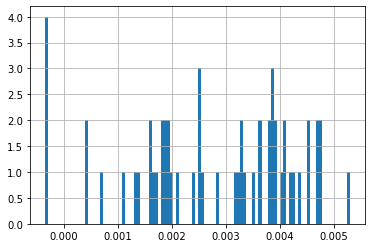

RMSE_2015_day_0_mii


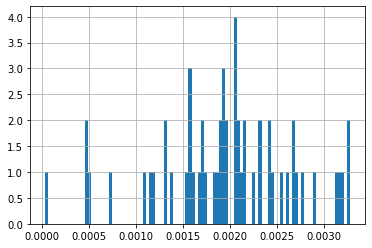

CPU times: user 6min 13s, sys: 1.74 s, total: 6min 15s
Wall time: 59.6 s


In [19]:
%%time

print_cols(COL_SETS.VARIOUS_COLS_2015)

various_df = train_generated_cols(
    gen_combinations(COL_SETS.VARIOUS_COLS_2015, 1, 4),
    LGB_PARAMS_BASE,
    DATA_SERIES_2015,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_2015)

# HORMONES


0it [00:00, ?it/s]

Number of columns: 8
-
    "test_inhibina_b_r",
    "test_tsh_r",
    "test_e2_r",
    "test_fsh_r",
    "test_lh_r",
    "test_testosterone_r",
    "test_shbg_r",
    "test_dhea_s_r",
-
# Number of column combinations: 8
# ETA: 0:00:07


8it [00:06,  1.32it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded  0.019467
1                                        RMSE_900_day_0_mii -0.037111
2                    RMSE_0b_first_time_900_cumulus_denuded  0.025868
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.050443
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.212950
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.055884
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.141136
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.176047
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.043781
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.029730
10                         RMSE_0b_first_time_900_day_0_mii -0.083873
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.116797
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.057855
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.183604
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.131977
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.197771
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.009652
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.107533

RMSE_900_cumulus_denuded


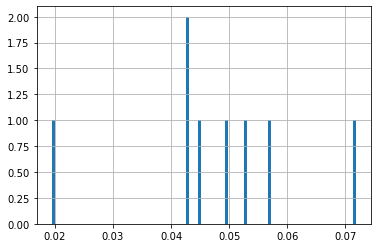

RMSE_900_day_0_mii


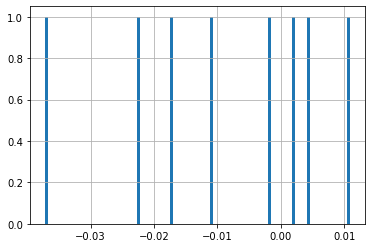

CPU times: user 30.9 s, sys: 204 ms, total: 31.1 s
Wall time: 6.63 s


In [20]:
%%time

print_cols(COL_SETS.HORMONE_COLS_900)

hormones_df = train_generated_cols(
    gen_combinations(COL_SETS.HORMONE_COLS_900, 1, 1),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)



0it [00:00, ?it/s]

Number of columns: 7
-
    "qual_result_num_FSH",
    "qual_result_num_DHEAS",
    "qual_result_num_Inh_B",
    "qual_result_num_TST",
    "qual_result_num_anty_TPO",
    "qual_result_num_TSH",
    "qual_result_num_SHBG",
-
# Number of column combinations: 7
# ETA: 0:00:13


7it [00:07,  1.01s/it]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_2015_cumulus_denuded -0.000197
1                                        RMSE_2015_day_0_mii -0.002630
2                    RMSE_0b_first_time_2015_cumulus_denuded -0.002315
3                  RMSE_0c_prev10ormore_2015_cumulus_denuded -0.020591
4   RMSE_1a_young35_highAMH1.2_prev0to3_2015_cumulus_denuded  0.004048
5   RMSE_1b_young35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.005062
6     RMSE_2a_old35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.006235
7     RMSE_2b_old35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.005029
8              RMSE_3_young35_lowAMH1.2_2015_cumulus_denuded -0.003358
9                RMSE_4_old35_lowAMH1.2_2015_cumulus_denuded -0.000817
10                         RMSE_0b_first_time_2015_day_0_mii -0.001039
11                       RMSE_0c_prev10ormore_2015_day_0_mii -0.001584
12        RMSE_1a_young35_highAMH1.2_prev0to3_2015_day_0_mii -0.001721
13        RMSE_1b_young35_highAMH1.2_prev4to9_2015_day_0_mii -0.010394
14          RMSE_2a_old35_highAMH1.2_prev0to3_2015_day_0_mii -0.011928
15          RMSE_2b_old35_highAMH1.2_prev4to9_2015_day_0_mii -0.010532
16                   RMSE_3_young35_lowAMH1.2_2015_day_0_mii -0.005603
17                     RMSE_4_old35_lowAMH1.2_2015_day_0_mii -0.000491

RMSE_2015_cumulus_denuded


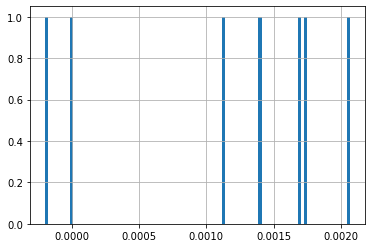

RMSE_2015_day_0_mii


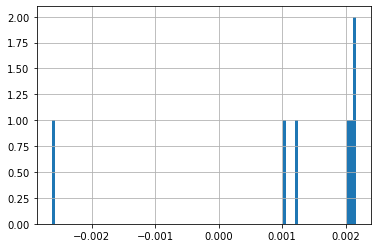

CPU times: user 45.7 s, sys: 244 ms, total: 45.9 s
Wall time: 7.63 s


In [21]:
%%time

print_cols(COL_SETS.HORMONE_COLS_2015)

hormones_df = train_generated_cols(
    gen_combinations(COL_SETS.HORMONE_COLS_2015, 1, 1),
    LGB_PARAMS_BASE,
    DATA_SERIES_2015,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_2015)

# HORMONES - NORMS


0it [00:00, ?it/s]

Number of columns: 8
-
    "norm_dhea_s",
    "norm_shbg",
    "norm_testosterone",
    "norm_fsh",
    "norm_tsh",
    "norm_lh",
    "norm_e2",
    "norm_inhibina_b",
-
# Number of column combinations: 36
# ETA: 0:00:32


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1it [00:00,  1.11it/

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
9it [00:06,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
17it [00:13,  1.22it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

25it [00:20,  1.25it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
34it [00:27,  1.27it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.005117
1                                        RMSE_900_day_0_mii -0.023877
2                    RMSE_0b_first_time_900_cumulus_denuded -0.001647
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.107217
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.163859
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.037435
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.160302
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.169448
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.093381
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.083097
10                         RMSE_0b_first_time_900_day_0_mii -0.068781
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.124495
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.083056
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.141169
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.126048
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.136631
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.048813
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.058476

RMSE_900_cumulus_denuded


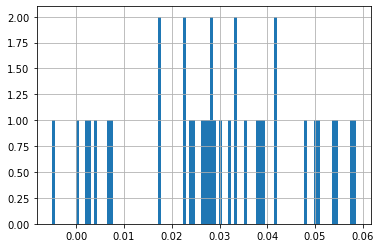

RMSE_900_day_0_mii


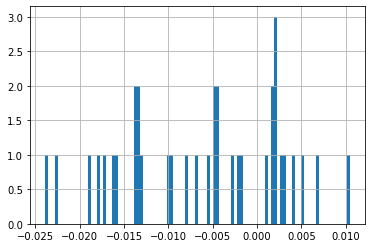

CPU times: user 2min 11s, sys: 876 ms, total: 2min 11s
Wall time: 29.4 s


In [22]:
%%time

print_cols(COL_SETS.HORMONE_NORMS_COLS_900)

norms_df = train_generated_cols(
    gen_combinations(COL_SETS.HORMONE_NORMS_COLS_900, 1, 2),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)



0it [00:00, ?it/s]

Number of columns: 7
-
    "norm_FSH",
    "norm_DHEAS",
    "norm_Inh_B",
    "norm_TST",
    "norm_TSH",
    "norm_SHBG",
    "norm_cycled_FSH",
-
# Number of column combinations: 28
# ETA: 0:00:50


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1it [00:01,  1.11s/i

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
9it [00:09,  1.06s/it]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
17it [00:18,  1.07s/it]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
25it [00:27,  1.14s/it]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_2015_cumulus_denuded -0.001482
1                                        RMSE_2015_day_0_mii -0.000743
2                    RMSE_0b_first_time_2015_cumulus_denuded -0.000173
3                  RMSE_0c_prev10ormore_2015_cumulus_denuded -0.026033
4   RMSE_1a_young35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.017341
5   RMSE_1b_young35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.000700
6     RMSE_2a_old35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.001445
7     RMSE_2b_old35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.002082
8              RMSE_3_young35_lowAMH1.2_2015_cumulus_denuded -0.000809
9                RMSE_4_old35_lowAMH1.2_2015_cumulus_denuded -0.001708
10                         RMSE_0b_first_time_2015_day_0_mii -0.000801
11                       RMSE_0c_prev10ormore_2015_day_0_mii -0.008287
12        RMSE_1a_young35_highAMH1.2_prev0to3_2015_day_0_mii -0.002820
13        RMSE_1b_young35_highAMH1.2_prev4to9_2015_day_0_mii -0.004013
14          RMSE_2a_old35_highAMH1.2_prev0to3_2015_day_0_mii -0.003071
15          RMSE_2b_old35_highAMH1.2_prev4to9_2015_day_0_mii -0.002272
16                   RMSE_3_young35_lowAMH1.2_2015_day_0_mii -0.001211
17                     RMSE_4_old35_lowAMH1.2_2015_day_0_mii -0.001416

RMSE_2015_cumulus_denuded


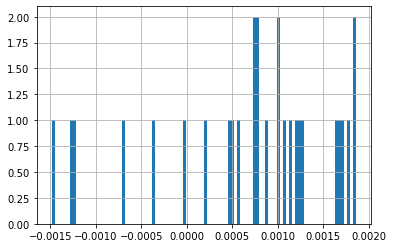

RMSE_2015_day_0_mii


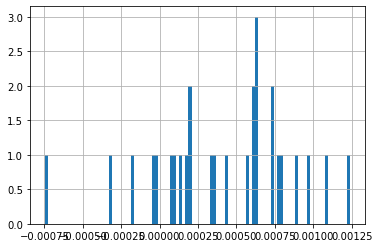

CPU times: user 2min 59s, sys: 964 ms, total: 3min
Wall time: 31.2 s


In [23]:
%%time

print_cols(COL_SETS.HORMONE_NORMS_COLS_2015)

norms_df = train_generated_cols(
    gen_combinations(COL_SETS.HORMONE_NORMS_COLS_2015, 1, 2),
    LGB_PARAMS_BASE,
    DATA_SERIES_2015,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_2015)

# HORMONES - NORMS VALID IN TIME


0it [00:00, ?it/s]

Number of columns: 8
-
    "valid_norm_dhea_s",
    "valid_norm_shbg",
    "valid_norm_testosterone",
    "valid_norm_fsh",
    "valid_norm_tsh",
    "valid_norm_lh",
    "valid_norm_e2",
    "valid_norm_inhibina_b",
-
# Number of column combinations: 36
# ETA: 0:00:32


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1it [00:00,  1.35it/

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
9it [00:06,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
17it [00:13,  1.28it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

25it [00:19,  1.26it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
34it [00:26,  1.17it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.002752
1                                        RMSE_900_day_0_mii -0.009944
2                    RMSE_0b_first_time_900_cumulus_denuded  0.007313
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.104560
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.147155
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.016219
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.062166
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.026722
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.019994
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.040546
10                         RMSE_0b_first_time_900_day_0_mii -0.023798
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.044189
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.036102
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.084480
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.044695
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.036238
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.022442
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.025793

RMSE_900_cumulus_denuded


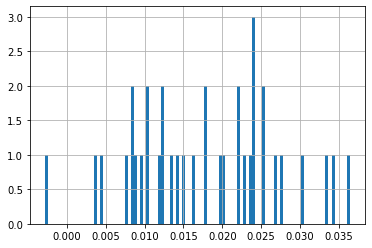

RMSE_900_day_0_mii


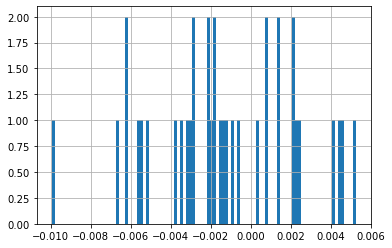

CPU times: user 2min 7s, sys: 719 ms, total: 2min 8s
Wall time: 29.1 s


In [24]:
%%time

print_cols(COL_SETS.HORMONE_NORMS_VALID_IN_TIME_COLS_900)

valid_norms_df = train_generated_cols(
    gen_combinations(COL_SETS.HORMONE_NORMS_VALID_IN_TIME_COLS_900, 1, 2),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)



0it [00:00, ?it/s]

Number of columns: 6
-
    "valid_norm_FSH",
    "valid_norm_DHEAS",
    "valid_norm_Inh_B",
    "valid_norm_TST",
    "valid_norm_TSH",
    "valid_norm_SHBG",
-
# Number of column combinations: 21
# ETA: 0:00:38


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1it [00:01,  1.11s/i

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
9it [00:09,  1.10s/it]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
17it [00:18,  1.11s/it]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_2015_cumulus_denuded -0.000949
1                                        RMSE_2015_day_0_mii -0.000773
2                    RMSE_0b_first_time_2015_cumulus_denuded -0.002699
3                  RMSE_0c_prev10ormore_2015_cumulus_denuded -0.005578
4   RMSE_1a_young35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.015157
5   RMSE_1b_young35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.002378
6     RMSE_2a_old35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.001191
7     RMSE_2b_old35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.004795
8              RMSE_3_young35_lowAMH1.2_2015_cumulus_denuded -0.001017
9                RMSE_4_old35_lowAMH1.2_2015_cumulus_denuded  0.000070
10                         RMSE_0b_first_time_2015_day_0_mii -0.000223
11                       RMSE_0c_prev10ormore_2015_day_0_mii -0.009244
12        RMSE_1a_young35_highAMH1.2_prev0to3_2015_day_0_mii  0.001991
13        RMSE_1b_young35_highAMH1.2_prev4to9_2015_day_0_mii -0.001931
14          RMSE_2a_old35_highAMH1.2_prev0to3_2015_day_0_mii -0.000423
15          RMSE_2b_old35_highAMH1.2_prev4to9_2015_day_0_mii  0.000240
16                   RMSE_3_young35_lowAMH1.2_2015_day_0_mii -0.004162
17                     RMSE_4_old35_lowAMH1.2_2015_day_0_mii -0.000518

RMSE_2015_cumulus_denuded


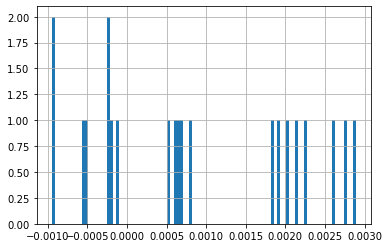

RMSE_2015_day_0_mii


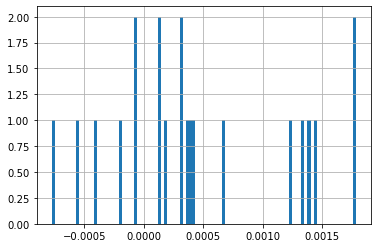

CPU times: user 2min 17s, sys: 738 ms, total: 2min 18s
Wall time: 24 s


In [25]:
%%time

print_cols(COL_SETS.HORMONE_NORMS_VALID_IN_TIME_COLS_2015)

valid_norms_df = train_generated_cols(
    gen_combinations(COL_SETS.HORMONE_NORMS_VALID_IN_TIME_COLS_2015, 1, 2),
    LGB_PARAMS_BASE,
    DATA_SERIES_2015,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_2015)


# FSH CYCLED NORM


0it [00:00, ?it/s]

Number of columns: 1
-
    "norm_cycled_FSH",
-
# Number of column combinations: 1
# ETA: 0:00:02


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1it [00:01,  1.11s/i

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_2015_cumulus_denuded -0.001222
1                                        RMSE_2015_day_0_mii  0.000186
2                    RMSE_0b_first_time_2015_cumulus_denuded  0.001029
3                  RMSE_0c_prev10ormore_2015_cumulus_denuded -0.026033
4   RMSE_1a_young35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.016271
5   RMSE_1b_young35_highAMH1.2_prev4to9_2015_cumulus_denuded  0.003945
6     RMSE_2a_old35_highAMH1.2_prev0to3_2015_cumulus_denuded  0.003663
7     RMSE_2b_old35_highAMH1.2_prev4to9_2015_cumulus_denuded  0.001893
8              RMSE_3_young35_lowAMH1.2_2015_cumulus_denuded  0.000989
9                RMSE_4_old35_lowAMH1.2_2015_cumulus_denuded  0.001963
10                         RMSE_0b_first_time_2015_day_0_mii  0.000216
11                       RMSE_0c_prev10ormore_2015_day_0_mii  0.000215
12        RMSE_1a_young35_highAMH1.2_prev0to3_2015_day_0_mii -0.000424
13        RMSE_1b_young35_highAMH1.2_prev4to9_2015_day_0_mii  0.000603
14          RMSE_2a_old35_highAMH1.2_prev0to3_2015_day_0_mii -0.001071
15          RMSE_2b_old35_highAMH1.2_prev4to9_2015_day_0_mii -0.000357
16                   RMSE_3_young35_lowAMH1.2_2015_day_0_mii -0.000186
17                     RMSE_4_old35_lowAMH1.2_2015_day_0_mii  0.000743

RMSE_2015_cumulus_denuded


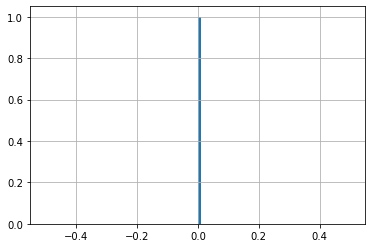

RMSE_2015_day_0_mii


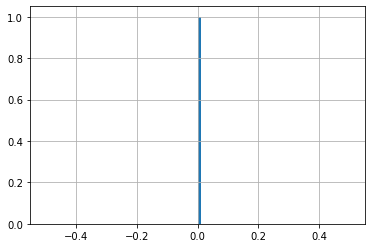

CPU times: user 7.24 s, sys: 56.2 ms, total: 7.3 s
Wall time: 1.66 s


In [26]:
%%time

print_cols(COL_SETS.FSH_NORM_CYCLED_COLS_2015)

valid_norms_df = train_generated_cols(
    gen_combinations(COL_SETS.FSH_NORM_CYCLED_COLS_2015, 1, 1),
    LGB_PARAMS_BASE,
    DATA_SERIES_2015,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_2015)

# VALID MEDS - SUM_DOSES


0it [00:00, ?it/s]

Number of columns: 19
-
    "valid_sum_dose_Agonista_GnRH",
    "valid_sum_dose_Agonista_recep_dopaminy",
    "valid_sum_dose_Antagonista_GnRH",
    "valid_sum_dose_Antykoncepcja",
    "valid_sum_dose_Bloker_fosfodiesterazy",
    "valid_sum_dose_Bloker_oksytocyny",
    "valid_sum_dose_DHEA",
    "valid_sum_dose_Doustna_stymulacja",
    "valid_sum_dose_Estrogeny",
    "valid_sum_dose_G_CSF",
    "valid_sum_dose_Glikokortykoidy",
    "valid_sum_dose_HCG_stymulacja_owulacji",
    "valid_sum_dose_Hormony_Tarczycy",
    "valid_sum_dose_Plaquenil",
    "valid_sum_dose_Progesteron",
    "valid_sum_dose_Testosteron",
    "valid_sum_dose_Letrozol",
    "valid_sum_dose_Dexametazon",
    "valid_sum_dose_Metypred",
-
# Number of column combinations: 19
# ETA: 0:00:17


19it [00:12,  1.47it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.089052
1                                        RMSE_900_day_0_mii -0.037129
2                    RMSE_0b_first_time_900_cumulus_denuded -0.115476
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.178571
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.213212
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.019577
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.074192
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.217384
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.028536
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.107943
10                         RMSE_0b_first_time_900_day_0_mii -0.030028
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.034359
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.135583
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.306239
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.029409
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.072320
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.020971
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.102256

RMSE_900_cumulus_denuded


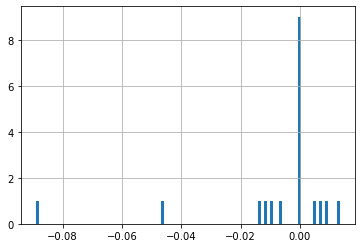

RMSE_900_day_0_mii


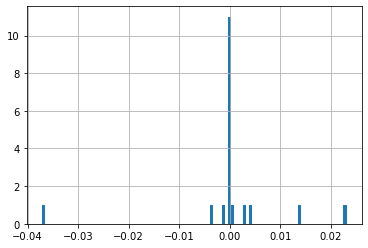

CPU times: user 1min 5s, sys: 345 ms, total: 1min 6s
Wall time: 13.6 s


In [27]:
%%time

print_cols(COL_SETS.VALID_SUM_DOSES_COLS_900)

literature_genes_df = train_generated_cols(
    gen_combinations(COL_SETS.VALID_SUM_DOSES_COLS_900, 1, 1),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    10, ETA_900)

# VALID MEDS - SUM_DOSES_AND_DAYS_DIFF


0it [00:00, ?it/s]

Number of columns: 20
-
    "['valid_sum_dose_Agonista_GnRH', 'valid_days_diff_Agonista_GnRH']",
    "['valid_sum_dose_Agonista_recep_dopaminy', 'valid_days_diff_Agonista_recep_dopaminy']",
    "['valid_sum_dose_Antagonista_GnRH', 'valid_days_diff_Antagonista_GnRH']",
    "['valid_sum_dose_Antykoncepcja', 'valid_days_diff_Antykoncepcja']",
    "['valid_sum_dose_Bloker_fosfodiesterazy', 'valid_days_diff_Bloker_fosfodiesterazy']",
    "['valid_sum_dose_Bloker_oksytocyny', 'valid_days_diff_Bloker_oksytocyny']",
    "['valid_sum_dose_DHEA', 'valid_days_diff_DHEA']",
    "['valid_sum_dose_Doustna_stymulacja', 'valid_days_diff_Doustna_stymulacja']",
    "['valid_sum_dose_Estrogeny', 'valid_days_diff_Estrogeny']",
    "['valid_sum_dose_G_CSF', 'valid_days_diff_G_CSF']",
    "['valid_sum_dose_Glikokortykoidy', 'valid_days_diff_Glikokortykoidy']",
    "['valid_sum_dose_Gonadotropiny', 'valid_days_diff_Gonadotropiny']",
    "['valid_sum_dose_HCG_stymulacja_owulacji', 'valid_days_diff_HCG_stymula

20it [00:13,  1.43it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.060990
1                                        RMSE_900_day_0_mii -0.035220
2                    RMSE_0b_first_time_900_cumulus_denuded -0.105690
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.184164
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.341143
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.041508
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.187471
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.211807
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.026158
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.116537
10                         RMSE_0b_first_time_900_day_0_mii -0.057220
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.028263
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.091645
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.166185
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.060766
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.081707
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.020971
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.083714

RMSE_900_cumulus_denuded


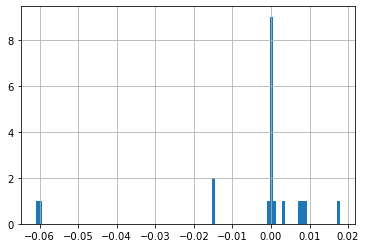

RMSE_900_day_0_mii


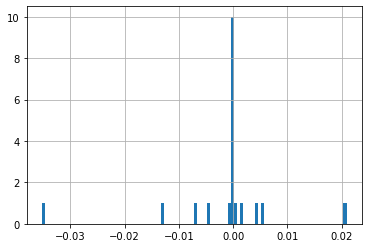

CPU times: user 1min 13s, sys: 432 ms, total: 1min 13s
Wall time: 14.7 s


In [28]:
%%time

print_cols(COL_SETS.VALID_SUM_DOSES_AND_DAYS_DIFF_COLS_900)

literature_genes_df = train_generated_cols(
    gen_flattened_combinations(COL_SETS.VALID_SUM_DOSES_AND_DAYS_DIFF_COLS_900, 1, 1),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    10, ETA_900)

# CAUSES


0it [00:00, ?it/s]

Number of columns: 11
-
    "cause_idiopathic",
    "cause_tubal",
    "cause_pco",
    "cause_genetic_female",
    "cause_endocrine_thyroid",
    "cause_endocrine_other",
    "cause_immuno",
    "cause_rpl_rif",
    "cause_low_ovar_res",
    "cause_poi",
    "cause_endometriosis",
-
# Number of column combinations: 231
# ETA: 0:03:26


231it [02:34,  1.49it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.009260
1                                        RMSE_900_day_0_mii -0.007096
2                    RMSE_0b_first_time_900_cumulus_denuded -0.013541
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.114813
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.062851
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded  0.000000
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.051559
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.009042
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.016119
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.065263
10                         RMSE_0b_first_time_900_day_0_mii -0.011371
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.067595
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.057445
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.123957
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.013805
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.006807
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.028131
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.022173

RMSE_900_cumulus_denuded


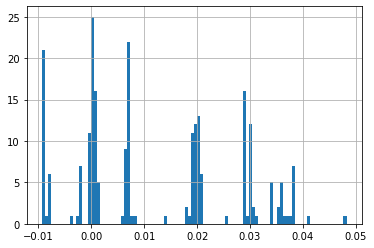

RMSE_900_day_0_mii


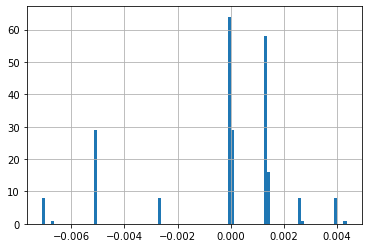

CPU times: user 12min 53s, sys: 4.01 s, total: 12min 57s
Wall time: 2min 35s


In [29]:
%%time

print_cols(COL_SETS.CAUSE_COLS_900)

causes_df = train_generated_cols(
    gen_combinations(COL_SETS.CAUSE_COLS_900, 1, 3),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)



0it [00:00, ?it/s]

Number of columns: 11
-
    "cause_idiopathic",
    "cause_tubal",
    "cause_pco",
    "cause_genetic_female",
    "cause_endocrine_thyroid",
    "cause_endocrine_other",
    "cause_immuno",
    "cause_rpl_rif",
    "cause_low_ovar_res",
    "cause_poi",
    "cause_endometriosis",
-
# Number of column combinations: 231
# ETA: 0:06:56


231it [03:54,  1.02s/it]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_2015_cumulus_denuded -0.005089
1                                        RMSE_2015_day_0_mii -0.001650
2                    RMSE_0b_first_time_2015_cumulus_denuded -0.006065
3                  RMSE_0c_prev10ormore_2015_cumulus_denuded -0.018094
4   RMSE_1a_young35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.027514
5   RMSE_1b_young35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.003027
6     RMSE_2a_old35_highAMH1.2_prev0to3_2015_cumulus_denuded -0.011711
7     RMSE_2b_old35_highAMH1.2_prev4to9_2015_cumulus_denuded -0.015035
8              RMSE_3_young35_lowAMH1.2_2015_cumulus_denuded -0.002811
9                RMSE_4_old35_lowAMH1.2_2015_cumulus_denuded -0.000208
10                         RMSE_0b_first_time_2015_day_0_mii -0.003668
11                       RMSE_0c_prev10ormore_2015_day_0_mii -0.014545
12        RMSE_1a_young35_highAMH1.2_prev0to3_2015_day_0_mii -0.016705
13        RMSE_1b_young35_highAMH1.2_prev4to9_2015_day_0_mii -0.004567
14          RMSE_2a_old35_highAMH1.2_prev0to3_2015_day_0_mii -0.004090
15          RMSE_2b_old35_highAMH1.2_prev4to9_2015_day_0_mii -0.008963
16                   RMSE_3_young35_lowAMH1.2_2015_day_0_mii -0.006410
17                     RMSE_4_old35_lowAMH1.2_2015_day_0_mii -0.007582

RMSE_2015_cumulus_denuded


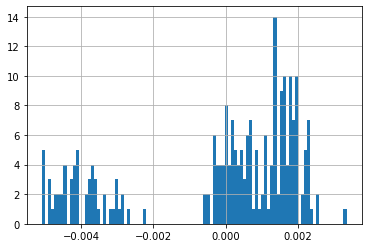

RMSE_2015_day_0_mii


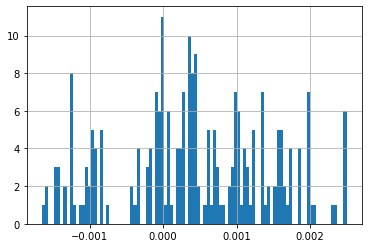

CPU times: user 25min 19s, sys: 6.91 s, total: 25min 26s
Wall time: 3min 55s


In [30]:
%%time

print_cols(COL_SETS.CAUSE_COLS_2015)

causes_df = train_generated_cols(
    gen_combinations(COL_SETS.CAUSE_COLS_2015, 1, 3),
    LGB_PARAMS_BASE,
    DATA_SERIES_2015,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_2015)

# ALL GENE CHANGES


0it [00:00, ?it/s]

# Number of column combinations: 673
# ETA: 0:10:01


673it [07:23,  1.52it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.027812
1                                        RMSE_900_day_0_mii -0.056988
2                    RMSE_0b_first_time_900_cumulus_denuded -0.068349
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.225494
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.185592
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.067891
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.143673
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.206525
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.049695
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.073462
10                         RMSE_0b_first_time_900_day_0_mii -0.100027
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.162490
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.040328
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.186163
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.245142
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.119856
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.031305
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.062264

RMSE_900_cumulus_denuded


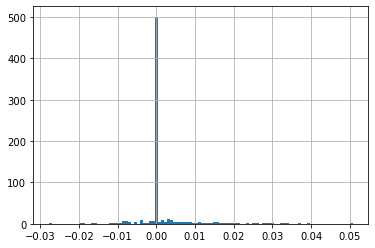

RMSE_900_day_0_mii


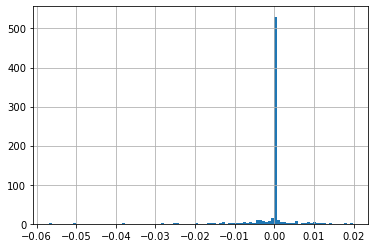

CPU times: user 35min 52s, sys: 10.8 s, total: 36min 3s
Wall time: 7min 24s


In [31]:
%%time

# print_cols(ALL_GENES_COLS)

all_genes_df = train_generated_cols(
    gen_combinations(GENE_COL_SETS.ALL_GENES_COLS_900, 1, 1),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    25, ETA_900)


# LITERATURE GENES


0it [00:00, ?it/s]

Number of columns: 18
-
    "AMH_19_2249478_G_T___Missense Variant",
    "ESR1_6_151842200_T_C___Intron Variant",
    "ESR1_6_151842246_A_G___Intron Variant",
    "ESR2_14_64233098_C_T___Non Coding Transcript Variant 3 Prime downstream",
    "ESR2_14_64257333_C_T___Synonymous Variant",
    "FSHR_2_49154446_C_T___5 Prime UTR Variant",
    "FSHR_2_48963902_C_T___Missense Variant",
    "FSHR_2_48962782_C_T___Missense Variant",
    "LHB_19_49016648_A_G___Missense Variant",
    "LHB_19_49016626_A_G___Missense Variant",
    "LHCGR_2_48755483_C_G___Intron Variant",
    "BMP15_X_50910775_C_G___5 Prime UTR Variant",
    "BMP15_X_50912016_A_G___Intron Variant",
    "BMP15_X_50911091_A_G___Missense Variant",
    "GDF9_5_132862408_C_T___Synonymous Variant",
    "OTHER_12_53423453_A_G___2KB Upstream Variant",
    "OTHER_11_30230805_G_T___2KB Upstream Variant",
    "OTHER_X_50910111_C_T___2KB Upstream Variant",
-
# Number of column combinations: 4047
# ETA: 1:00:13


4047it [47:31,  1.42it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.034441
1                                        RMSE_900_day_0_mii -0.038821
2                    RMSE_0b_first_time_900_cumulus_denuded -0.029481
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.272309
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.239941
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.059374
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.142757
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.188997
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.059594
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.102406
10                         RMSE_0b_first_time_900_day_0_mii -0.041394
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.184159
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.049563
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.291664
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.267741
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.145004
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.038965
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.051565

RMSE_900_cumulus_denuded


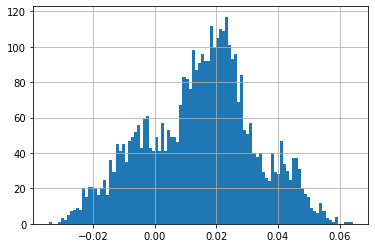

RMSE_900_day_0_mii


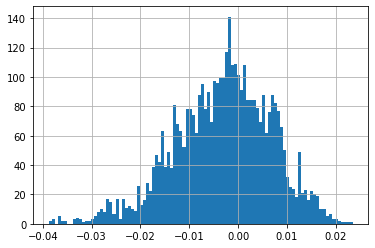

CPU times: user 4h 5min 21s, sys: 1min 11s, total: 4h 6min 32s
Wall time: 47min 32s


In [32]:
%%time

print_cols(GENE_COL_SETS.LITERATURE_GENES_COLS_900)

literature_genes_df = train_generated_cols(
    gen_combinations(GENE_COL_SETS.LITERATURE_GENES_COLS_900, 1, 4),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    10, ETA_900)


# HORMONES VS LITERATURE GENES


0it [00:00, ?it/s]

Number of columns: 8
-
    "test_inhibina_b_r",
    "test_tsh_r",
    "test_e2_r",
    "test_fsh_r",
    "test_lh_r",
    "test_testosterone_r",
    "test_shbg_r",
    "test_dhea_s_r",
-
Number of columns: 18
-
    "AMH_19_2249478_G_T___Missense Variant",
    "ESR1_6_151842200_T_C___Intron Variant",
    "ESR1_6_151842246_A_G___Intron Variant",
    "ESR2_14_64233098_C_T___Non Coding Transcript Variant 3 Prime downstream",
    "ESR2_14_64257333_C_T___Synonymous Variant",
    "FSHR_2_49154446_C_T___5 Prime UTR Variant",
    "FSHR_2_48963902_C_T___Missense Variant",
    "FSHR_2_48962782_C_T___Missense Variant",
    "LHB_19_49016648_A_G___Missense Variant",
    "LHB_19_49016626_A_G___Missense Variant",
    "LHCGR_2_48755483_C_G___Intron Variant",
    "BMP15_X_50910775_C_G___5 Prime UTR Variant",
    "BMP15_X_50912016_A_G___Intron Variant",
    "BMP15_X_50911091_A_G___Missense Variant",
    "GDF9_5_132862408_C_T___Synonymous Variant",
    "OTHER_12_53423453_A_G___2KB Upstream Variant",
    "

1368it [15:19,  1.49it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.006756
1                                        RMSE_900_day_0_mii -0.050919
2                    RMSE_0b_first_time_900_cumulus_denuded -0.010500
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.208888
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.313004
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.116762
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.368271
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.225408
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.061640
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.096415
10                         RMSE_0b_first_time_900_day_0_mii -0.099368
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.223111
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.139405
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.330463
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.286803
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.254777
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.048591
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.117207

RMSE_900_cumulus_denuded


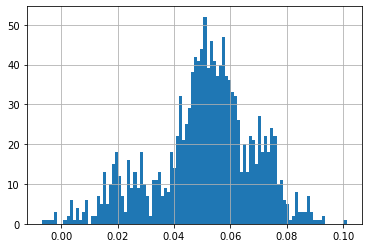

RMSE_900_day_0_mii


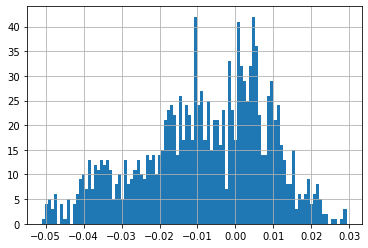

CPU times: user 1h 16min 13s, sys: 20.6 s, total: 1h 16min 33s
Wall time: 15min 20s


In [33]:
%%time

print_cols(COL_SETS.HORMONE_COLS_900)
print_cols(GENE_COL_SETS.LITERATURE_GENES_COLS_900)

hormoes_vs_literature_genes_df = train_generated_cols(
    gen_product_generators_2(
        gen_combinations(COL_SETS.HORMONE_COLS_900, 1, 1),
        gen_combinations(GENE_COL_SETS.LITERATURE_GENES_COLS_900, 1, 2),
    ),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    25, ETA_900)


# HORMONE NORMS VS LITERATURE GENES



0it [00:00, ?it/s]

Number of columns: 8
-
    "norm_dhea_s",
    "norm_shbg",
    "norm_testosterone",
    "norm_fsh",
    "norm_tsh",
    "norm_lh",
    "norm_e2",
    "norm_inhibina_b",
-
Number of columns: 18
-
    "AMH_19_2249478_G_T___Missense Variant",
    "ESR1_6_151842200_T_C___Intron Variant",
    "ESR1_6_151842246_A_G___Intron Variant",
    "ESR2_14_64233098_C_T___Non Coding Transcript Variant 3 Prime downstream",
    "ESR2_14_64257333_C_T___Synonymous Variant",
    "FSHR_2_49154446_C_T___5 Prime UTR Variant",
    "FSHR_2_48963902_C_T___Missense Variant",
    "FSHR_2_48962782_C_T___Missense Variant",
    "LHB_19_49016648_A_G___Missense Variant",
    "LHB_19_49016626_A_G___Missense Variant",
    "LHCGR_2_48755483_C_G___Intron Variant",
    "BMP15_X_50910775_C_G___5 Prime UTR Variant",
    "BMP15_X_50912016_A_G___Intron Variant",
    "BMP15_X_50911091_A_G___Missense Variant",
    "GDF9_5_132862408_C_T___Synonymous Variant",
    "OTHER_12_53423453_A_G___2KB Upstream Variant",
    "OTHER_11_3023080

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1it [00:00,  1.20it/

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
9it [00:06,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden

17it [00:12,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
26it [00:19,  1.26it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Datase

34it [00:25,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
43it [00:32,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

51it [00:39,  1.17it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
60it [00:46,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

68it [00:52,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
77it [00:59,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

85it [01:05,  1.28it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
94it [01:12,  1.27it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridde

102it [01:18,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
111it [01:25,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Datas

119it [01:31,  1.27it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
128it [01:38,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
136it [01:44,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

144it [01:51,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
153it [01:58,  1.26it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
161it [02:04,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

169it [02:10,  1.26it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
178it [02:17,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

186it [02:23,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
195it [02:30,  1.28it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

203it [02:36,  1.23it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
212it [02:43,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

220it [02:49,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
229it [02:56,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
237it [03:02,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

245it [03:08,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
254it [03:15,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

262it [03:22,  1.20it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
271it [03:29,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

279it [03:35,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
288it [03:41,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
296it [03:48,  1.27it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

304it [03:54,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
313it [04:01,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
321it [04:07,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

329it [04:13,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
338it [04:20,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
346it [04:26,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

354it [04:32,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
363it [04:39,  1.24it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
371it [04:45,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

379it [04:51,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
388it [04:58,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

396it [05:04,  1.36it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
405it [05:11,  1.35it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

413it [05:17,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
422it [05:24,  1.35it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

430it [05:30,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
439it [05:37,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

447it [05:43,  1.27it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
456it [05:50,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

464it [05:56,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
473it [06:03,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
481it [06:09,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

489it [06:15,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
498it [06:22,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
506it [06:28,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
514it [06:34,  1.26it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
523it [06:41,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

531it [06:47,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
540it [06:54,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

548it [07:00,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
557it [07:07,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

565it [07:13,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
574it [07:20,  1.22it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

582it [07:26,  1.35it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
591it [07:33,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

599it [07:39,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
608it [07:46,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Datas

616it [07:52,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
625it [07:59,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

633it [08:05,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
642it [08:12,  1.25it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

650it [08:18,  1.26it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
659it [08:25,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Datas

667it [08:31,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
676it [08:39,  1.22it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

684it [08:45,  1.27it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
693it [08:51,  1.37it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

701it [08:57,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
710it [09:04,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Datas

718it [09:10,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
727it [09:17,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

735it [09:23,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
744it [09:30,  1.28it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
752it [09:36,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

760it [09:42,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
769it [09:49,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
777it [09:55,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

785it [10:01,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
794it [10:08,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
802it [10:14,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

810it [10:20,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
819it [10:27,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
827it [10:33,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

835it [10:40,  1.22it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
844it [10:47,  1.23it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
852it [10:53,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

860it [10:59,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
869it [11:06,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

877it [11:12,  1.26it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
886it [11:19,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
894it [11:25,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

902it [11:31,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
911it [11:38,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
919it [11:44,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
927it [11:51,  1.21it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
936it [11:58,  1.25it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
944it [12:04,  1.26it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

952it [12:10,  1.27it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
961it [12:18,  1.26it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
969it [12:24,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

977it [12:30,  1.27it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
986it [12:37,  1.15it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
994it [12:44,  1.23it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridd

1002it [12:51,  1.26it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1011it [12:58,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1019it [13:04,  1.28it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1027it [13:11,  1.23it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1036it [13:17,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1044it [13:23,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1052it [13:30,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1061it [13:37,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1069it [13:43,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1077it [13:49,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1086it [13:55,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1094it [14:01,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1102it [14:08,  1.27it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1111it [14:15,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1119it [14:21,  1.23it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1127it [14:27,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1136it [14:34,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1144it [14:41,  1.20it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1152it [14:47,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1161it [14:54,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1169it [15:00,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1177it [15:07,  1.25it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1186it [15:13,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1194it [15:20,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1203it [15:26,  1.34it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1211it [15:32,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1220it [15:39,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1228it [15:45,  1.28it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1237it [15:52,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1245it [15:58,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1254it [16:05,  1.32it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1262it [16:11,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1271it [16:18,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1279it [16:24,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1288it [16:31,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Data

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1296it [16:37,  1.28it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1305it [16:45,  1.29it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1313it [16:51,  1.33it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1322it [16:58,  1.28it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1330it [17:04,  1.25it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1339it [17:11,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1347it [17:17,  1.27it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1356it [17:24,  1.31it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

1364it [17:30,  1.30it/s]Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overrid

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.028148
1                                        RMSE_900_day_0_mii -0.044070
2                    RMSE_0b_first_time_900_cumulus_denuded -0.019114
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.254317
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.245632
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.091907
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.170975
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.207446
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.104110
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.092359
10                         RMSE_0b_first_time_900_day_0_mii -0.084133
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.226702
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.097113
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.322734
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.294212
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.179353
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.044640
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.056951

RMSE_900_cumulus_denuded


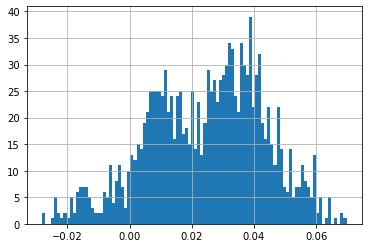

RMSE_900_day_0_mii


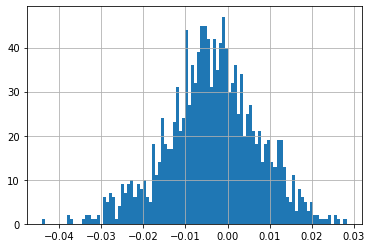

CPU times: user 1h 20min 43s, sys: 26.4 s, total: 1h 21min 9s
Wall time: 17min 34s


In [34]:
%%time

print_cols(COL_SETS.HORMONE_NORMS_COLS_900)
print_cols(GENE_COL_SETS.LITERATURE_GENES_COLS_900)

hormoes_vs_literature_genes_df = train_generated_cols(
    gen_product_generators_2(
        gen_combinations(COL_SETS.HORMONE_NORMS_COLS_900, 1, 1),
        gen_combinations(GENE_COL_SETS.LITERATURE_GENES_COLS_900, 1, 2),
    ),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    25, ETA_900)

# HORMONES VS SHORTLIST_CONST_900


0it [00:00, ?it/s]

Number of columns: 8
-
    "test_inhibina_b_r",
    "test_tsh_r",
    "test_e2_r",
    "test_fsh_r",
    "test_lh_r",
    "test_testosterone_r",
    "test_shbg_r",
    "test_dhea_s_r",
-
Number of columns: 6
-
    "ESR2_14_64227364_T_C",
    "OTHER_X_50910111_C_T___2KB Upstream Variant",
    "SOX9_17_72125967_G_A",
    "AR_X_67723521_-_ACACAC",
    "GDF9_5_132866205_T_C",
    "LHCGR_2_48729278_C_T",
-
# Number of column combinations: 48
# ETA: 0:00:43


48it [00:31,  1.52it/s]

model: l2
sorted_by: RMSE


index         0
0                                  RMSE_900_cumulus_denuded -0.001845
1                                        RMSE_900_day_0_mii -0.078444
2                    RMSE_0b_first_time_900_cumulus_denuded  0.000880
3                  RMSE_0c_prev10ormore_900_cumulus_denuded -0.241598
4   RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded -0.236403
5   RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded -0.106502
6     RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded -0.306038
7     RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded -0.308373
8              RMSE_3_young35_lowAMH1.2_900_cumulus_denuded -0.054328
9                RMSE_4_old35_lowAMH1.2_900_cumulus_denuded -0.095323
10                         RMSE_0b_first_time_900_day_0_mii -0.119033
11                       RMSE_0c_prev10ormore_900_day_0_mii -0.266604
12        RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii -0.079818
13        RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii -0.331776
14          RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii -0.383304
15          RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii -0.219442
16                   RMSE_3_young35_lowAMH1.2_900_day_0_mii -0.023918
17                     RMSE_4_old35_lowAMH1.2_900_day_0_mii -0.114753

RMSE_900_cumulus_denuded


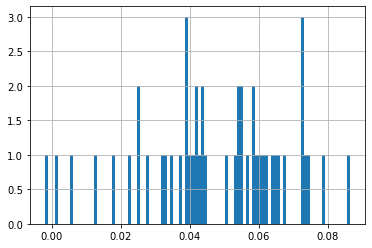

RMSE_900_day_0_mii


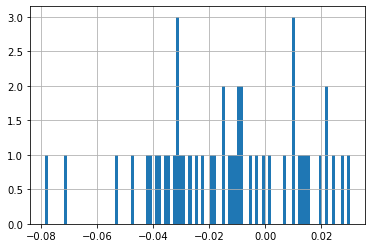

CPU times: user 2min 35s, sys: 779 ms, total: 2min 36s
Wall time: 32.2 s


In [35]:
%%time

print_cols(COL_SETS.HORMONE_COLS_900)
print_cols(GENE_COL_SETS.SHORTLIST_CONST_900)

hormoes_vs_boruta_genes_df = train_generated_cols(
    gen_product_generators_2(
        gen_combinations(COL_SETS.HORMONE_COLS_900, 1, 1),
        gen_combinations(GENE_COL_SETS.SHORTLIST_CONST_900, 1, 1),
    ),
    LGB_PARAMS_BASE, 
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    25, ETA_900)


In [36]:
print(f'DONE: {format(datetime.now() - start_time)}')

DONE: 1:42:47.054385
